In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=true')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


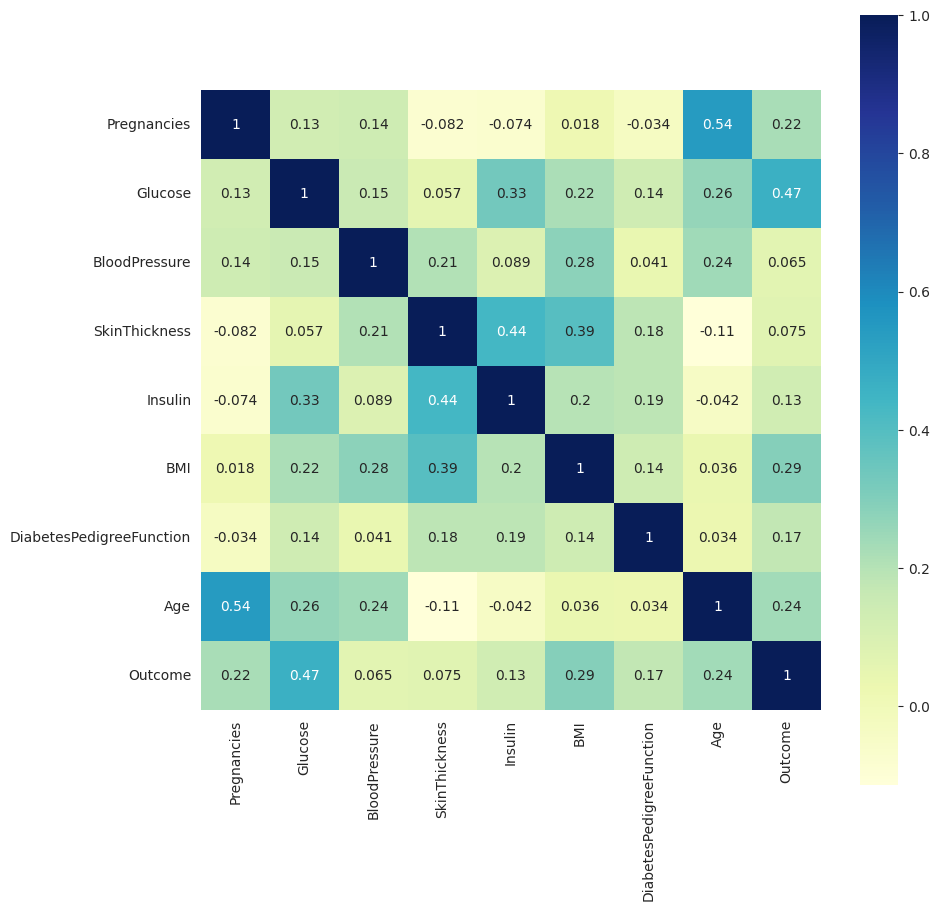

In [60]:
corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(data=corr, square=True, annot=True, cmap="YlGnBu")
plt.show()

In [61]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [62]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param = {'n_neighbors': np.arange(1, 20)}
knn = KNeighborsClassifier()

knn_search_cv = GridSearchCV(knn, param, cv=5)

knn_search_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [64]:
best_K = knn_search_cv.best_params_.get('n_neighbors')

best_K

14

In [65]:
knn = KNeighborsClassifier(n_neighbors=best_K)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [68]:
X_train = scaler.fit_transform(X_train)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [69]:
X_test = scaler.fit_transform(X_test)

y_predict = knn.predict(X_test)

y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [70]:
from sklearn.metrics import jaccard_score

jaccard_score = jaccard_score(y_test, y_predict)
jaccard_score

0.36923076923076925

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_predict)
f1_score = f1_score(y_test, y_predict)
precision_score = precision_score(y_test, y_predict)
recall_score = recall_score(y_test, y_predict)

print('accuracy:', accuracy)
print('f1_score:', f1_score)
print('precision_score:', precision_score)
print('recall_score:', recall_score)

accuracy: 0.7337662337662337
f1_score: 0.5393258426966292
precision_score: 0.6857142857142857
recall_score: 0.4444444444444444
